# Data Visualization

In [107]:
import pandas as pd

df = pd.read_csv("/kaggle/input/padma-bridge-toll-dataset/Padma_Bridge - Traffic.csv", parse_dates=['Date'])

df.set_index('Date', inplace=True)
df = df.sort_index()

print(df.head())

            Traffic_Mawa  Traffic_Jajira  Cash_Mawa  Cash_Jajira  \
Date                                                               
2022-01-07         13801           12597   16542100     15111100   
2022-01-08          6071            6259    9195100      9670800   
2022-01-09          6414            6154    9588950      9781100   
2022-01-10          6887            7653   10002700     11063300   
2022-01-11          6184            6430    9729450     10116450   

            Total_Traffic Total_Cash  
Date                                  
2022-01-07          26398   31653200  
2022-01-08          12330   18865900  
2022-01-09          12568   19370050  
2022-01-10          14540   21066000  
2022-01-11          12614   19845900  


## Mawa

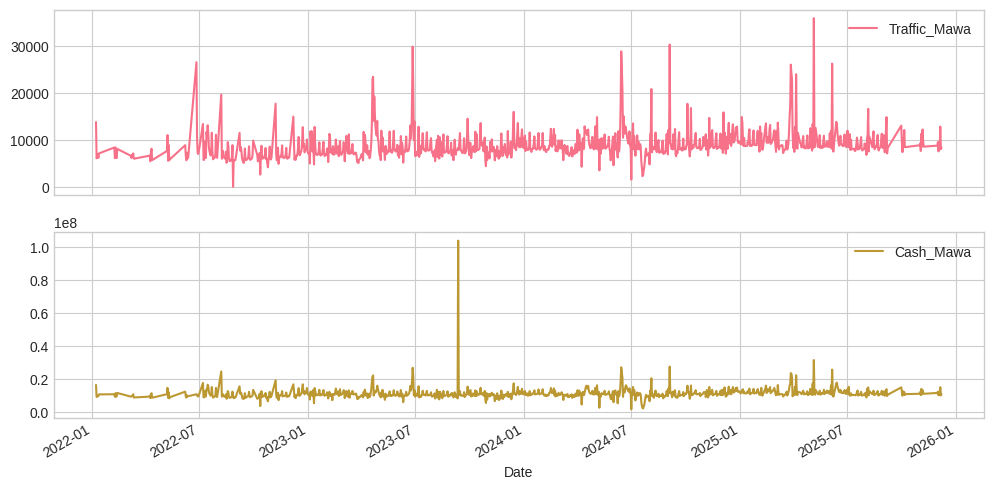

In [108]:
import matplotlib.pyplot as plt

df[['Traffic_Mawa', 'Cash_Mawa']].plot(subplots=True, figsize=(12,6))
plt.show()

## Jajira

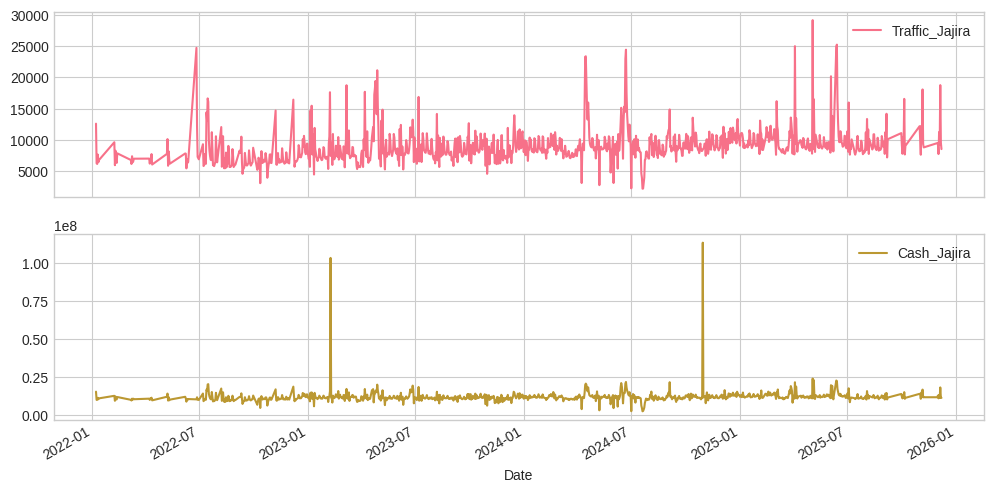

In [109]:
import matplotlib.pyplot as plt

df[['Traffic_Jajira', 'Cash_Jajira']].plot(subplots=True, figsize=(12,6))
plt.show()

# Stationarity Check using Augmented Dickey-Fuller (ADF) Test

In [110]:
from statsmodels.tsa.stattools import adfuller

import pandas as pd

def adf_test_table(series, series_name):
    result = adfuller(series)
    summary_df = pd.DataFrame({
        'Series': [series_name],
        'ADF Statistic': [result[0]],
        'p-value': [result[1]],
        '1% Critical': [result[4]['1%']],
        '5% Critical': [result[4]['5%']],
        '10% Critical': [result[4]['10%']],
        'Stationary': ['Yes' if result[1] <= 0.05 else 'No']
    })
    return summary_df

##   Mawa

In [111]:
summary_mawa = pd.concat([
    adf_test_table(df['Traffic_Mawa'], 'Traffic_Mawa'),
    adf_test_table(df['Cash_Mawa'], 'Cash_Mawa')
])
display(summary_mawa)

,Series,ADF Statistic,p-value,1% Critical,5% Critical,10% Critical,Stationary
0,Traffic_Mawa,-8.658702,4.888691e-14,-3.435985,-2.864028,-2.568095,Yes
0,Cash_Mawa,-16.438851,2.438670e-29,-3.435966,-2.864020,-2.568090,Yes


## Jajira

In [112]:
summary_jajira = pd.concat([
    adf_test_table(df['Traffic_Jajira'], 'Traffic_Jajira'),
    adf_test_table(df['Cash_Jajira'], 'Cash_Jajira')
])
display(summary_jajira)

,Series,ADF Statistic,p-value,1% Critical,5% Critical,10% Critical,Stationary
0,Traffic_Jajira,-8.254537,5.280539e-13,-3.435985,-2.864028,-2.568095,Yes
0,Cash_Jajira,-21.347521,0.000000e+00,-3.435961,-2.864018,-2.568089,Yes


# Autocorrelation and Partial-Autocorrelation Function

## Mawa

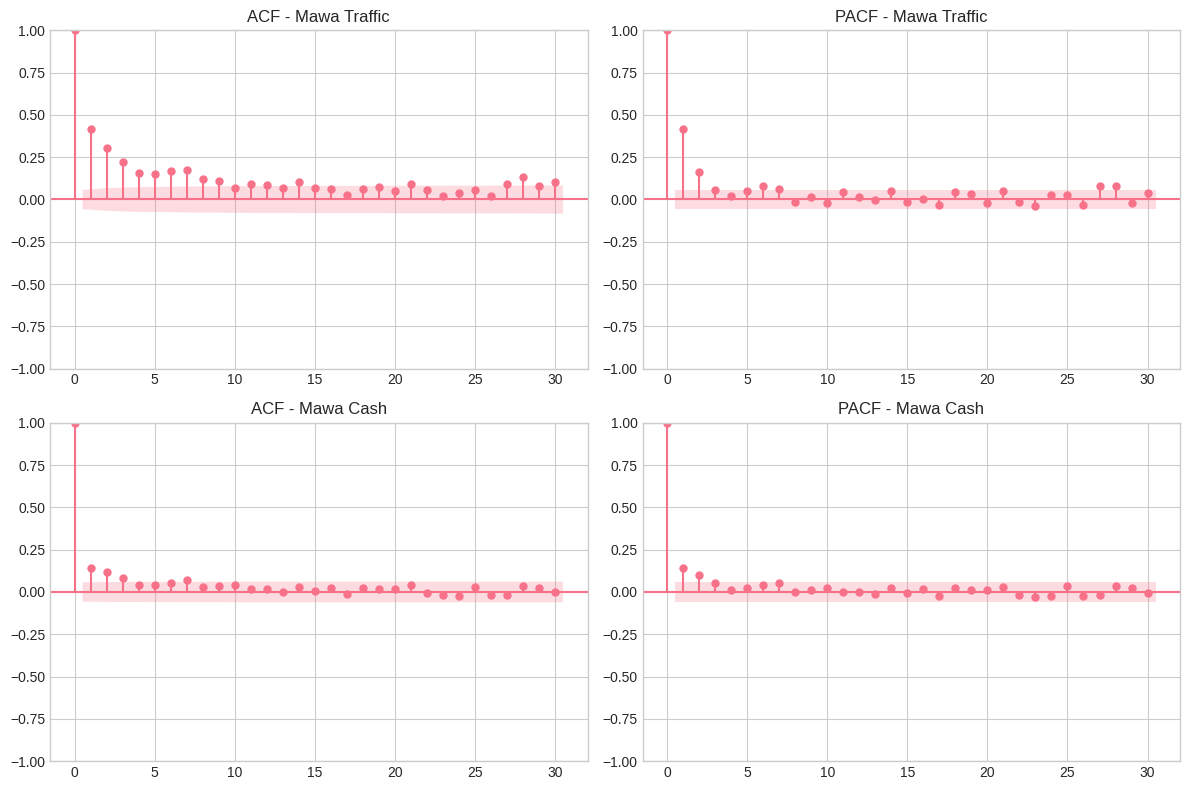

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(12,8))

plot_acf(df['Traffic_Mawa'], ax=ax[0,0], lags=30)
ax[0,0].set_title("ACF - Mawa Traffic")

plot_pacf(df['Traffic_Mawa'], ax=ax[0,1], lags=30)
ax[0,1].set_title("PACF - Mawa Traffic")

plot_acf(df['Cash_Mawa'], ax=ax[1,0], lags=30)
ax[1,0].set_title("ACF - Mawa Cash")

plot_pacf(df['Cash_Mawa'], ax=ax[1,1], lags=30)
ax[1,1].set_title("PACF - Mawa Cash")

plt.tight_layout()
plt.show()

## Jajira

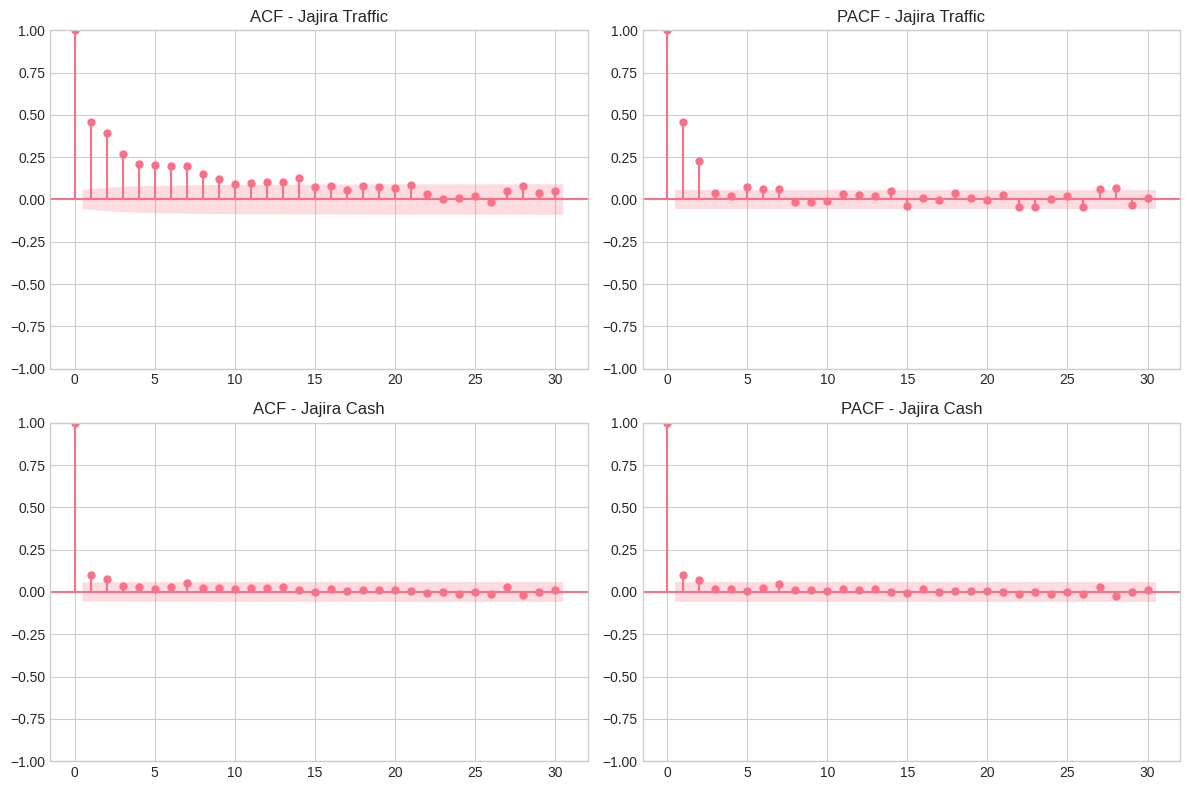

In [138]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(12,8))

plot_acf(df['Traffic_Jajira'], ax=ax[0,0], lags=30)
ax[0,0].set_title("ACF - Jajira Traffic")

plot_pacf(df['Traffic_Jajira'], ax=ax[0,1], lags=30)
ax[0,1].set_title("PACF - Jajira Traffic")

plot_acf(df['Cash_Jajira'], ax=ax[1,0], lags=30)
ax[1,0].set_title("ACF - Jajira Cash")

plot_pacf(df['Cash_Jajira'], ax=ax[1,1], lags=30)
ax[1,1].set_title("PACF - Jajira Cash")

plt.tight_layout()
plt.show()

# ARIMA Model

## Mawa

In [143]:
from statsmodels.tsa.arima.model import ARIMA

mawa_traffic_model = ARIMA(df['Traffic_Mawa'], order=(1,1,1)).fit()
mawa_cash_model = ARIMA(df['Cash_Mawa'], order=(1,1,1)).fit()

print("Mawa Traffic Model Summary:")
print(mawa_traffic_model.summary())

print("\n Mawa Cash Model Summary:")
print(mawa_cash_model.summary())

Mawa Traffic Model Summary:
                               SARIMAX Results                                
Dep. Variable:           Traffic_Mawa   No. Observations:                 1170
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -10865.373
Date:                Sun, 14 Sep 2025   AIC                          21738.747
Time:                        05:24:47   BIC                          21759.003
Sample:                             0   HQIC                         21746.387
                               - 1170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3133      0.015     20.535      0.000       0.283       0.343
ar.L2          0.1277      0.022      5.725      0.000       0.084       0.171
ma.L1         -0.9885   

## Jajira

In [147]:
jajira_traffic_model = ARIMA(df['Traffic_Jajira'], order=(1,1,1)).fit()
jajira_cash_model = ARIMA(df['Cash_Jajira'], order=(1,1,1)).fit()

print("Jajira Traffic Model Summary:")
print(jajira_traffic_model.summary())

print("\n Jajira Cash Model Summary:")
print(jajira_cash_model.summary())

Jajira Traffic Model Summary:
                               SARIMAX Results                                
Dep. Variable:         Traffic_Jajira   No. Observations:                 1170
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10719.307
Date:                Sun, 14 Sep 2025   AIC                          21444.613
Time:                        05:25:42   BIC                          21459.805
Sample:                             0   HQIC                         21450.343
                               - 1170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3909      0.017     23.338      0.000       0.358       0.424
ma.L1         -0.9830      0.006   -151.815      0.000      -0.996      -0.970
sigma2       5.85e+06 

# Forecasting

In [117]:
def forecast_next_n_days(name, model_traffic, model_cash, df, n_days=30):
    last_date = df.index[-1]

    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_days, freq='D')

    traffic_forecast = model_traffic.forecast(steps=n_days).round(0).astype(int)
    cash_forecast = model_cash.forecast(steps=n_days).round(0).astype(int)

    forecast_df = pd.DataFrame({
        'Date': future_dates,
        f'{name} Traffic Forecast': traffic_forecast,
        f'{name} Cash Forecast': cash_forecast
    })
    forecast_df.set_index('Date', inplace=True)

    return forecast_df

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def plot_forecast_traffic_and_cash(forecast_df, name, figsize=(12, 6)):
    fig, ax1 = plt.subplots(figsize=figsize)
    
    plt.style.use('seaborn-v0_8-whitegrid')
    
    line1 = ax1.plot(forecast_df.index, forecast_df[f'{name} Traffic Forecast'], 
                     color='#2E86AB', linewidth=3, marker='o', markersize=7, 
                     label='Traffic Forecast', markerfacecolor='white', 
                     markeredgewidth=2, alpha=0.9)
    
    ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Traffic Volume', color='#2E86AB', fontsize=12, fontweight='bold')
    ax1.tick_params(axis='y', labelcolor='#2E86AB', labelsize=10)
    ax1.tick_params(axis='x', labelsize=10)
    
    # Second y-axis is for cash
    ax2 = ax1.twinx()
    line2 = ax2.plot(forecast_df.index, forecast_df[f'{name} Cash Forecast'], 
                     color='#A23B72', linewidth=3, marker='D', markersize=7,
                     label='Cash Forecast', markerfacecolor='white', 
                     markeredgewidth=2, alpha=0.9)
    
    ax2.set_ylabel('Cash Amount', color='#A23B72', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#A23B72', labelsize=10)
    
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) 
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=max(1, len(forecast_df)//8)))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, 
              loc='upper left', frameon=True, fancybox=True, 
              shadow=True, fontsize=11)

    plt.title(f'{name} Traffic & Cash Forecast\n({len(forecast_df)} days prediction)', 
             fontsize=16, fontweight='bold', pad=20)
    ax1.grid(True, alpha=0.4, linestyle='--')
    
    ax1.set_facecolor('#f8f9fa')
    
    fig.tight_layout()
    plt.show()

In [119]:
import pandas as pd

def print_forecast_summary_table(forecast_df, name):
    traffic_data = forecast_df[f'{name} Traffic Forecast']
    cash_data = forecast_df[f'{name} Cash Forecast']
    
    summary_dict = {
        'Metric': ['Mean', 'Maximum', 'Minimum', 'Std Dev', 'Trend'],
        f'{name} Traffic': [
            round(traffic_data.mean(), 2),
            traffic_data.max(),
            traffic_data.min(),
            round(traffic_data.std(), 2),
            'Increasing' if traffic_data.iloc[-1] > traffic_data.iloc[0] else 'Decreasing'
        ],
        f'{name} Cash': [
            round(cash_data.mean(), 2),
            cash_data.max(),
            cash_data.min(),
            round(cash_data.std(), 2),
            'Increasing' if cash_data.iloc[-1] > cash_data.iloc[0] else 'Decreasing'
        ]
    }

    summary_df = pd.DataFrame(summary_dict)
    print(f"\nForecast Summary Table for {name.upper()} ({len(forecast_df)} days)")
    display(summary_df) 
    return summary_df

In [120]:
print(last_date)

2025-12-08 00:00:00


In [140]:
N_DAYS = 10

## Mawa

In [151]:
forecast_table = forecast_next_n_days('Mawa', mawa_traffic_model, mawa_cash_model, df, n_days=N_DAYS)
print(forecast_table)

            Mawa Traffic Forecast  Mawa Cash Forecast
Date                                                 
2025-12-09                   9030            11664007
2025-12-10                   9279            11818949
2025-12-11                   9438            11902392
2025-12-12                   9519            11925996
2025-12-13                   9565            11936195
2025-12-14                   9590            11939495
2025-12-15                   9603            11940791
2025-12-16                   9611            11941237
2025-12-17                   9615            11941405
2025-12-18                   9617            11941464


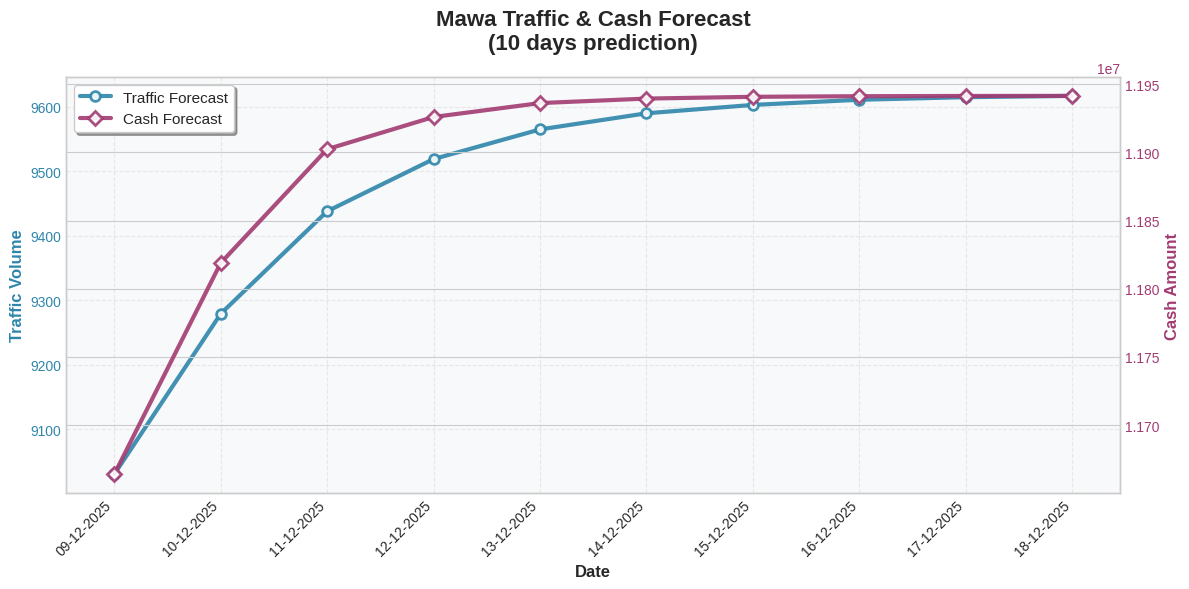

In [152]:
plot_forecast_traffic_and_cash(forecast_table, 'Mawa')

In [146]:
summary_table = print_forecast_summary_table(forecast_table, 'Mawa')


Forecast Summary Table for MAWA (10 days)


,Metric,Mawa Traffic,Mawa Cash
0,Mean,9486.7,11895193.1
1,Maximum,9617,11941464
2,Minimum,9030,11664007
3,Std Dev,192.74,89678.67
4,Trend,Increasing,Increasing


## Jajira

In [148]:
forecast_table = forecast_next_n_days('Jajira', jajira_traffic_model, jajira_cash_model, df, n_days=N_DAYS)
print(forecast_table)

            Jajira Traffic Forecast  Jajira Cash Forecast
Date                                                     
2025-12-09                     9437              12118384
2025-12-10                     9792              12212419
2025-12-11                     9930              12220650
2025-12-12                     9984              12221371
2025-12-13                    10006              12221434
2025-12-14                    10014              12221439
2025-12-15                    10017              12221440
2025-12-16                    10018              12221440
2025-12-17                    10019              12221440
2025-12-18                    10019              12221440


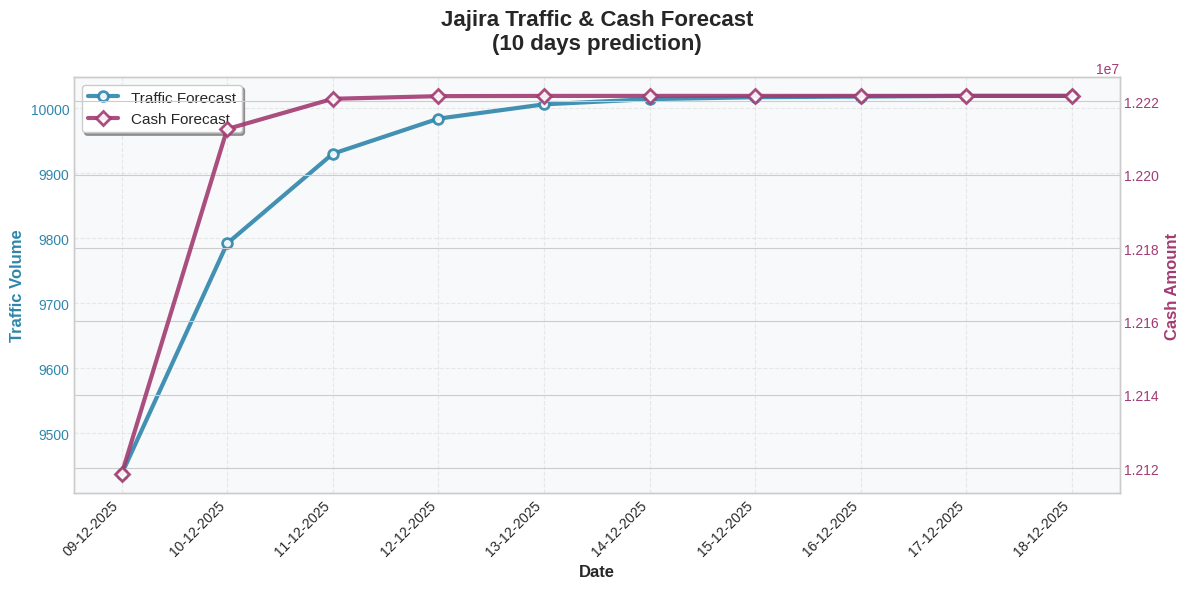

In [149]:
plot_forecast_traffic_and_cash(forecast_table, 'Jajira')

In [150]:
summary_table = print_forecast_summary_table(forecast_table, 'Jajira')


Forecast Summary Table for JAJIRA (10 days)


,Metric,Jajira Traffic,Jajira Cash
0,Mean,9923.6,12210145.7
1,Maximum,10019,12221440
2,Minimum,9437,12118384
3,Std Dev,185.17,32364.13
4,Trend,Increasing,Increasing
